In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
#from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from itertools import combinations

EDA Of Top 100 Post Titles

In [33]:
posts_segmented = pd.read_csv("C:/Semester 7/NLP/EDA/posts.csv")
posts_segmented.head()

,Unnamed: 0,title,id,score,url,num_comments,body,date,nsfw,sticky_post,flair-text,upvote_ratio
0,0,"POKHARA, LAKESIDE - Mahaseer cafe",fnztjy,4950,https://i.redd.it/f62x1h8x5ko41.jpg,156,NaN,2020-03-24 05:41:18,False,False,NaN,0.99
1,1,minimalism was made in Nepal,ogolge,1355,https://i.redd.it/iuvt1y6uc4a71.png,55,NaN,2021-07-09 05:01:56,False,False,Humor/हाँस्य,0.99
2,2,Never been on a Plane and a friend sent this,shqno2,1195,https://i.redd.it/4434gi71u6f81.jpg,74,NaN,2022-02-01 09:09:36,False,False,Society/समाज,0.99
3,3,This video made my day!!! I dont know if this ...,xlldxp,1121,https://v.redd.it/57cpn4revip91,48,NaN,2022-09-23 02:48:58,False,False,NaN,0.99
4,4,My take on Nepali Lo-Fi girl daylight version,iossvg,1052,https://i.redd.it/sin7nnx55xl51.png,106,NaN,2020-09-08 12:39:41,False,False,Art/कला,0.99


In [34]:
#Removing all null titles
posts_segmented.dropna(subset=['title'])
posts_segmented.head()


,Unnamed: 0,title,id,score,url,num_comments,body,date,nsfw,sticky_post,flair-text,upvote_ratio
0,0,"POKHARA, LAKESIDE - Mahaseer cafe",fnztjy,4950,https://i.redd.it/f62x1h8x5ko41.jpg,156,NaN,2020-03-24 05:41:18,False,False,NaN,0.99
1,1,minimalism was made in Nepal,ogolge,1355,https://i.redd.it/iuvt1y6uc4a71.png,55,NaN,2021-07-09 05:01:56,False,False,Humor/हाँस्य,0.99
2,2,Never been on a Plane and a friend sent this,shqno2,1195,https://i.redd.it/4434gi71u6f81.jpg,74,NaN,2022-02-01 09:09:36,False,False,Society/समाज,0.99
3,3,This video made my day!!! I dont know if this ...,xlldxp,1121,https://v.redd.it/57cpn4revip91,48,NaN,2022-09-23 02:48:58,False,False,NaN,0.99
4,4,My take on Nepali Lo-Fi girl daylight version,iossvg,1052,https://i.redd.it/sin7nnx55xl51.png,106,NaN,2020-09-08 12:39:41,False,False,Art/कला,0.99


In [35]:
# Pre-processing the comments to acheive the following points:
#   1. Removing the URLs using standard patterns like https, http, r/
#   2. Removing special characters other than periods and commas
#   3. Converting into lowercase
#   4. Only handling the english comments using ASCII range
#   5. Removing any characters that are not word characters, spaces or periods
#   6. Removing any extra spaces between two words
for index, row in posts_segmented.iterrows():
    text = row["title"]
    url_pattern = r'https\S*|http\S*|www\.\S*|r/\S*'
    cleaned = re.sub(url_pattern, r'', text)
    cleaned = re.sub(r'[?|!|\'|"|#|%|$|@|*|(|)|\-|_|=|+]', r' ', cleaned)
    cleaned = cleaned.lower()
    cleaned = re.sub(r'[^\x00-\x7F]+', ' ', cleaned)
    cleaned = re.sub(r'(?<!\d)\.(?!\d)', ' ', cleaned)  # This preserves only decimal points
    cleaned = re.sub(r'[^\w\s.]', ' ', cleaned)
    cleaned = ' '.join(cleaned.split())
    posts_segmented.at[index, "title"] = cleaned


#posts_segmented

In [36]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english'))

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to NOUN if no specific tag is found

for index, row in posts_segmented.iterrows():
    text = row["title"]
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    pos_tags = nltk.pos_tag(filtered_tokens)
    # Lemmatization with POS tagging
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos_tag))
                     for token, pos_tag in pos_tags]
    processed_comment = ' '.join(lemmatized_tokens)
    posts_segmented.at[index, "title"] = processed_comment

#posts_segmented

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


EDA

In [37]:
posts_segmented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    100 non-null    int64  
 1   title         100 non-null    object 
 2   id            100 non-null    object 
 3   score         100 non-null    int64  
 4   url           100 non-null    object 
 5   num_comments  100 non-null    int64  
 6   body          3 non-null      object 
 7   date          100 non-null    object 
 8   nsfw          100 non-null    bool   
 9   sticky_post   100 non-null    bool   
 10  flair-text    85 non-null     object 
 11  upvote_ratio  100 non-null    float64
dtypes: bool(2), float64(1), int64(3), object(6)
memory usage: 8.1+ KB


In [38]:
posts_segmented.describe()

,Unnamed: 0,score,num_comments,upvote_ratio
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,781.120000,72.040000,0.987700
std,29.011492,448.948655,61.818882,0.011088
min,0.000000,583.000000,16.000000,0.940000
25%,24.750000,614.500000,38.000000,0.980000
50%,49.500000,683.500000,54.500000,0.990000
75%,74.250000,844.750000,86.000000,0.990000
max,99.000000,4950.000000,490.000000,1.000000


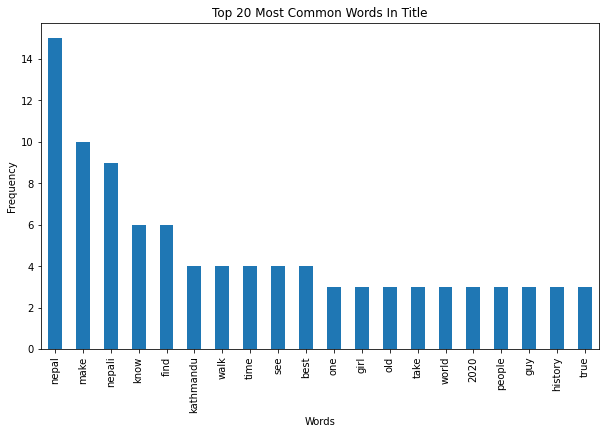

In [39]:
# Word Frequency Analysis
word_freq = pd.Series(' '.join(posts_segmented['title']).split()).value_counts()
#print(word_freq)
word_freq[:20].plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 Most Common Words In Title')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [40]:
print("Number of Distinct words in the entire corpus: ", len(word_freq))

Number of Distinct words in the entire corpus:  420


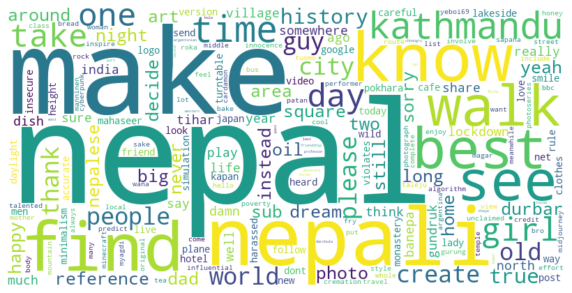

In [41]:
# Word Cloud
# Filter comments to consider only words with minimum length 3
filtered_comments = ' '.join([' '.join([word for word in comment.split() if len(word) >= 3]) for comment in posts_segmented['title']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_comments)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

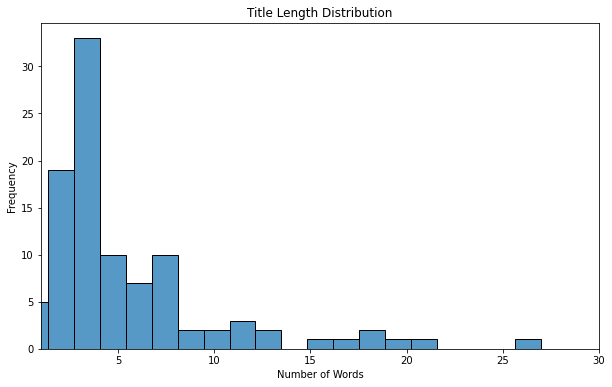

In [42]:
# Comment Length Distribution
posts_segmented['title_length'] = posts_segmented['title'].apply(lambda x: len(x.split()))
plt.figure(figsize = (10,6))
sns.histplot(data=posts_segmented, x='title_length', bins=20)
plt.title('Title Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(xmin=1, xmax = 30)
plt.show()

In [43]:
posts_segmented

,Unnamed: 0,title,id,score,url,num_comments,body,date,nsfw,sticky_post,flair-text,upvote_ratio,title_length
0,0,pokhara lakeside mahaseer cafe,fnztjy,4950,https://i.redd.it/f62x1h8x5ko41.jpg,156,NaN,2020-03-24 05:41:18,False,False,NaN,0.99,4
1,1,minimalism make nepal,ogolge,1355,https://i.redd.it/iuvt1y6uc4a71.png,55,NaN,2021-07-09 05:01:56,False,False,Humor/हाँस्य,0.99,3
2,2,never plane friend send,shqno2,1195,https://i.redd.it/4434gi71u6f81.jpg,74,NaN,2022-02-01 09:09:36,False,False,Society/समाज,0.99,4
3,3,video make day dont know post violates rule,xlldxp,1121,https://v.redd.it/57cpn4revip91,48,NaN,2022-09-23 02:48:58,False,False,NaN,0.99,8
4,4,take nepali girl daylight version,iossvg,1052,https://i.redd.it/sin7nnx55xl51.png,106,NaN,2020-09-08 12:39:41,False,False,Art/कला,0.99,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,hai tihar aayo,js8u63,592,https://i.redd.it/ilnllxnycmy51.jpg,37,NaN,2020-11-11 14:14:29,False,False,Humor/हाँस्य,0.99,3
96,96,lmfao find gem,pukmb2,585,https://i.redd.it/gxfllcj5acp71.jpg,36,NaN,2021-09-24 14:11:55,False,False,Humor/हाँस्य,0.99,3
97,97,old house digital draw december 2020,klojao,583,https://i.redd.it/ex16558usw761.jpg,32,NaN,2020-12-28 11:03:47,False,False,Art/कला,1.00,6
98,98,city dream nepali girl,jqpotl,587,https://i.imgur.com/PjibmOO.jpg,31,NaN,2020-11-09 03:06:29,False,False,NaN,0.99,4


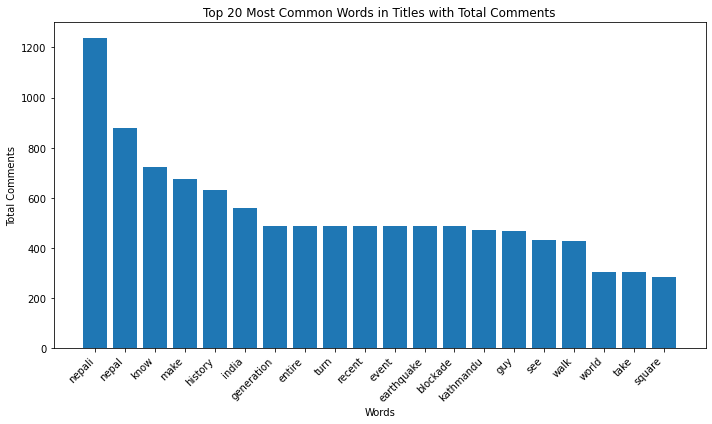

In [44]:

data = {'title': posts_segmented['title'],
        'comment_numbers': posts_segmented['num_comments']}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate word frequencies
word_freq = pd.Series(' '.join(df['title']).split()).value_counts()

# Create a new DataFrame for words and their corresponding total comment numbers
word_comment_df = pd.DataFrame({'word': word_freq.index, 'total_comments': 0})

# Calculate the total comments for each word
for index, row in df.iterrows():
    for word in row['title'].split():
        if word in word_comment_df['word'].values:
            word_comment_df.loc[word_comment_df['word'] == word, 'total_comments'] += row['comment_numbers']

# Sort the DataFrame by word frequencies and select the top 20 words
top_20_words = word_comment_df.sort_values(by='total_comments', ascending=False).head(20)

# Plot the top 20 words and their total comment numbers
plt.figure(figsize=(10, 6))
plt.bar(top_20_words['word'], top_20_words['total_comments'])
plt.title('Top 20 Most Common Words in Titles with Total Comments')
plt.xlabel('Words')
plt.ylabel('Total Comments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [45]:
#Adjusting Non English Scripts
posts_segmented['flair-text'] = posts_segmented['flair-text'].apply(lambda x: x.split('/')[0] if isinstance(x, str) else x)

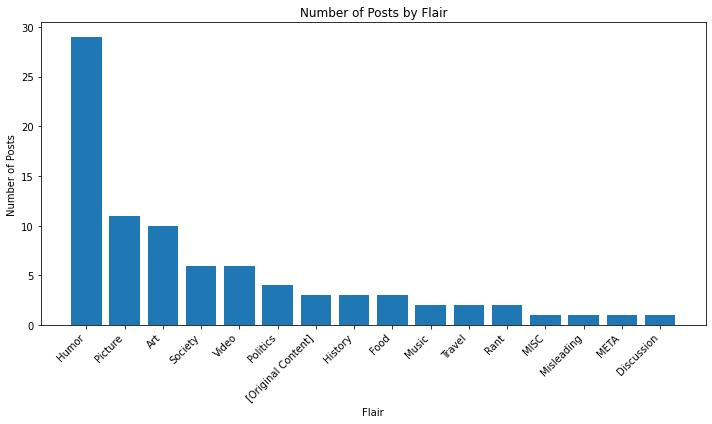

In [46]:
data = {'title': posts_segmented['title'],
        'flair': posts_segmented['flair-text']}
df = pd.DataFrame(data)

# Count the number of posts for each flair
flair_counts = df['flair'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(flair_counts.index, flair_counts.values)
plt.title('Number of Posts by Flair')
plt.xlabel('Flair')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


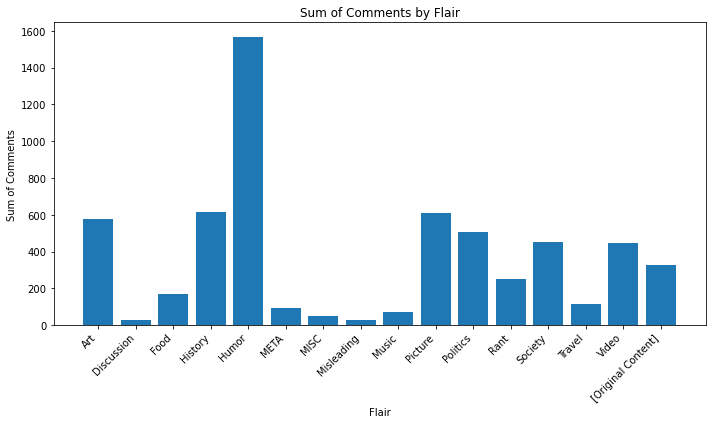

In [47]:
data = {'title': posts_segmented['title'],
        'flair': posts_segmented['flair-text'],
        'comments': posts_segmented['num_comments']}
df = pd.DataFrame(data)

# Group the data by 'flair' and calculate the sum of total upvotes for each flair
flair_upvotes = df.groupby('flair')['comments'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(flair_upvotes.index, flair_upvotes.values)
plt.title('Sum of Comments by Flair')
plt.xlabel('Flair')
plt.ylabel('Sum of Comments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


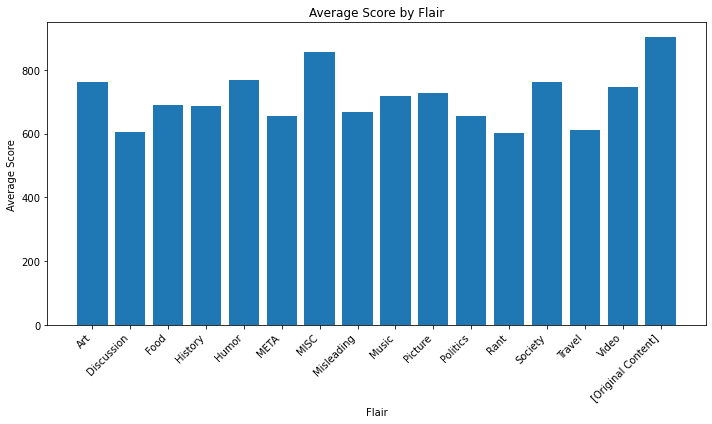

In [48]:
data = {'title': posts_segmented['title'],
        'flair': posts_segmented['flair-text'],
        'score': posts_segmented['score']}
df = pd.DataFrame(data)

# Group the data by 'flair' and calculate the average total upvotes for each flair
flair_avg_upvotes = df.groupby('flair')['score'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(flair_avg_upvotes.index, flair_avg_upvotes.values)
plt.title('Average Score by Flair')
plt.xlabel('Flair')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


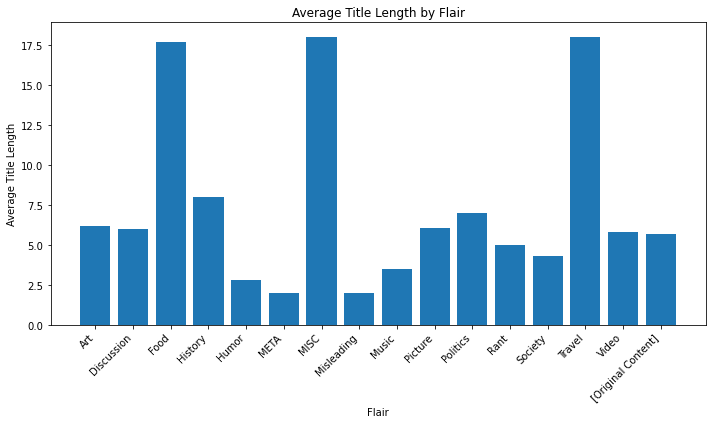

In [49]:
data = {'title': posts_segmented['title'],
        'flair': posts_segmented['flair-text'],
        'title_length': posts_segmented['title_length']}
df = pd.DataFrame(data)

# Group the data by 'flair' and calculate the average total upvotes for each flair
flair_avg_upvotes = df.groupby('flair')['title_length'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(flair_avg_upvotes.index, flair_avg_upvotes.values)
plt.title('Average Title Length by Flair')
plt.xlabel('Flair')
plt.ylabel('Average Title Length')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

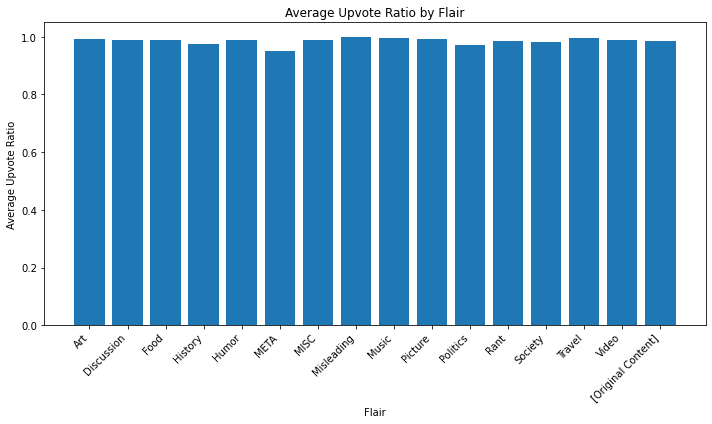

In [50]:
data = {'title': posts_segmented['title'],
        'flair': posts_segmented['flair-text'],
        'upvote': posts_segmented['upvote_ratio']}
df = pd.DataFrame(data)

# Group the data by 'flair' and calculate the average total upvotes for each flair
flair_avg_upvotes = df.groupby('flair')['upvote'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(flair_avg_upvotes.index, flair_avg_upvotes.values)
plt.title('Average Upvote Ratio by Flair')
plt.xlabel('Flair')
plt.ylabel('Average Upvote Ratio')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


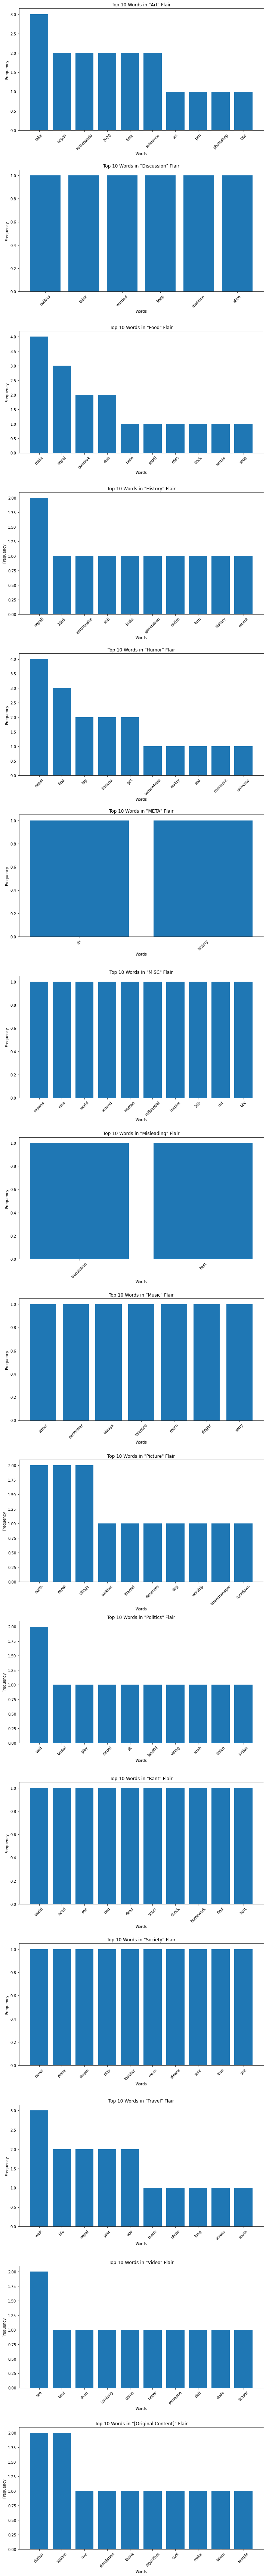

In [51]:
data = {'title': posts_segmented['title'],
        'flair': posts_segmented['flair-text']}
df = pd.DataFrame(data)

# Group the data by 'flair' column
grouped = df.groupby('flair')

# Create subplots for each flair
fig, axs = plt.subplots(len(grouped), figsize=(10, 6 * len(grouped)))

# Iterate through each flair group
for i, (flair, group) in enumerate(grouped):
    # Calculate word frequencies for titles within this flair
    word_freq = pd.Series(' '.join(group['title']).split()).value_counts()
    
    # Select the top 10 words
    top_10_words = word_freq.head(10)
    
    # Plot a histogram for this flair
    axs[i].bar(top_10_words.index, top_10_words.values)
    axs[i].set_title(f'Top 10 Words in "{flair}" Flair')
    axs[i].set_xlabel('Words')
    axs[i].set_ylabel('Frequency')
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [52]:
posts_segmented[posts_segmented['sticky_post'] == 'True']

,Unnamed: 0,title,id,score,url,num_comments,body,date,nsfw,sticky_post,flair-text,upvote_ratio,title_length


EDA - Comments From Top 100 Posts

In [53]:
comments_segmented = pd.read_csv("C:/Semester 7/NLP/final_preprocessed_comments.csv")

In [54]:
comments_segmented['character_count'] = comments_segmented['comment'].str.len()
comments_segmented['word_count'] = comments_segmented['comment'].apply(lambda x: len(x.split()))


In [55]:
comments_segmented.head()

,Sr No.,Unnamed: 0,post_id,comment,upvotes,time,is_submitter,Preprocessed,character_count,word_count
0,1,0,fnztjy,"I know this place. The owner is a cool guy, bu...",46,2020-03-24 08:34:57,False,know place owner cool guy like customer smokin...,98,20
1,2,1,fnztjy,Now I'm 100 sure I'll come visit your country ...,49,2020-03-24 11:34:33,False,100 sure come visit country lovely,80,16
2,3,3,fnztjy,Wholesome.,14,2020-03-24 06:58:37,False,wholesome,10,1
3,4,4,fnztjy,I was planning to visit Nepal sometime in Apri...,8,2020-03-24 13:28:17,False,planning visit nepal sometime april one last s...,275,49
4,5,5,fnztjy,How much is 100r in US dollars?,8,2020-03-24 12:11:15,False,much 100r u dollar,31,7


nepal         748
like          575
people        547
ko            495
u             430
             ... 
celebrity       1
wata            1
smartfully      1
bhandei         1
lololol         1
Length: 13100, dtype: int64


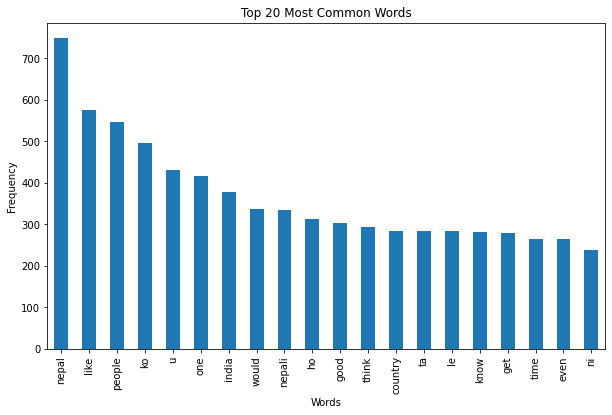

In [56]:
# Word Frequency Analysis
word_freq = pd.Series(' '.join(comments_segmented['Preprocessed']).split()).value_counts()
print(word_freq)
word_freq[:20].plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [57]:
comments_segmented

,Sr No.,Unnamed: 0,post_id,comment,upvotes,time,is_submitter,Preprocessed,character_count,word_count
0,1,0,fnztjy,"I know this place. The owner is a cool guy, bu...",46,2020-03-24 08:34:57,False,know place owner cool guy like customer smokin...,98,20
1,2,1,fnztjy,Now I'm 100 sure I'll come visit your country ...,49,2020-03-24 11:34:33,False,100 sure come visit country lovely,80,16
2,3,3,fnztjy,Wholesome.,14,2020-03-24 06:58:37,False,wholesome,10,1
3,4,4,fnztjy,I was planning to visit Nepal sometime in Apri...,8,2020-03-24 13:28:17,False,planning visit nepal sometime april one last s...,275,49
4,5,5,fnztjy,How much is 100r in US dollars?,8,2020-03-24 12:11:15,False,much 100r u dollar,31,7
...,...,...,...,...,...,...,...,...,...,...
6806,6807,6989,j93jhd,Is this satirical?\n\nEven if its not its crin...,1,2020-10-12 13:01:02,False,satirical even cringy af,49,10
6807,6808,6990,j93jhd,Vaag muji.\n\n________________________________...,-2,2020-10-11 16:27:49,False,vaag muji bleep bloop bot comment made anti po...,169,21
6808,6809,6991,j93jhd,A centuries old enslaved Sanghi bhaiyya who is...,4,2020-10-12 21:41:51,False,century old enslaved sanghi bhaiyya beaten bla...,416,69
6809,6810,6992,j93jhd,I reply to braindead retards on life support o...,0,2020-10-13 18:12:47,False,reply braindead retard life support twice mont...,391,72


Number of Distinct words in the entire corpus:  13100


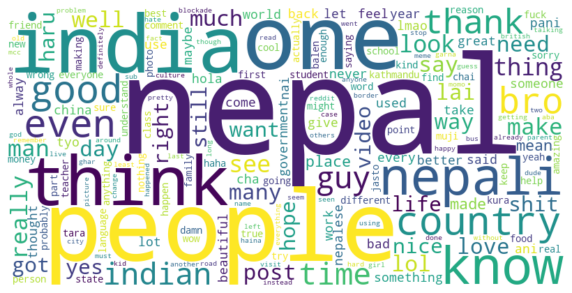

In [58]:
print("Number of Distinct words in the entire corpus: ", len(word_freq))
# Filter comments to consider only words with minimum length 3
filtered_comments = ' '.join([' '.join([word for word in comment.split() if len(word) >= 3]) for comment in comments_segmented['Preprocessed']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_comments)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

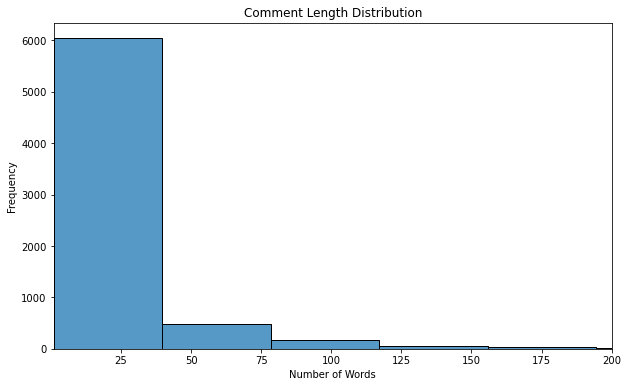

Maximum number of words in a Comment:  775
Average number of words in a Comment:  19.3819


In [59]:
# Comment Length Distribution
comments_segmented['Comment_Length'] = comments_segmented['comment'].apply(lambda x: len(x.split()))
plt.figure(figsize = (10,6))
sns.histplot(data=comments_segmented, x='Comment_Length', bins=20)
plt.title('Comment Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(xmin=1, xmax = 200)
plt.show()

print("Maximum number of words in a Comment: ", max(comments_segmented["Comment_Length"]))
print("Average number of words in a Comment: ", round(np.mean(comments_segmented["Comment_Length"]),4))

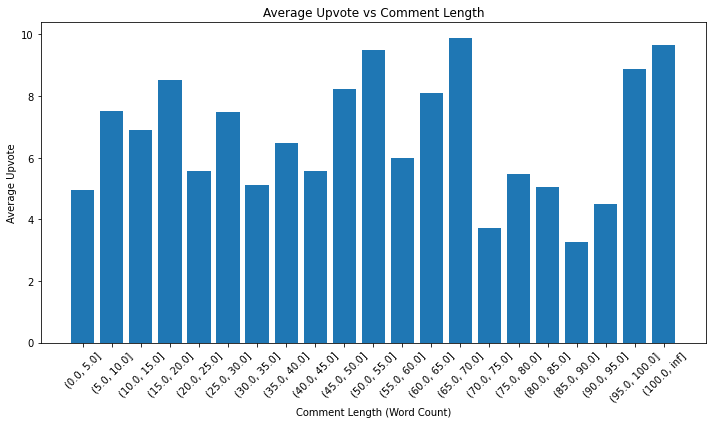

In [60]:
# Define the bins for comment length
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, float('inf')]

# Cut the data into bins and calculate the average upvote for each bin
comments_segmented['comment_length_bin'] = pd.cut(comments_segmented['word_count'], bins)
average_upvotes = comments_segmented.groupby('comment_length_bin')['upvotes'].mean()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(average_upvotes.index.astype(str), average_upvotes.values)
plt.xlabel('Comment Length (Word Count)')
plt.ylabel('Average Upvote')
plt.title('Average Upvote vs Comment Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

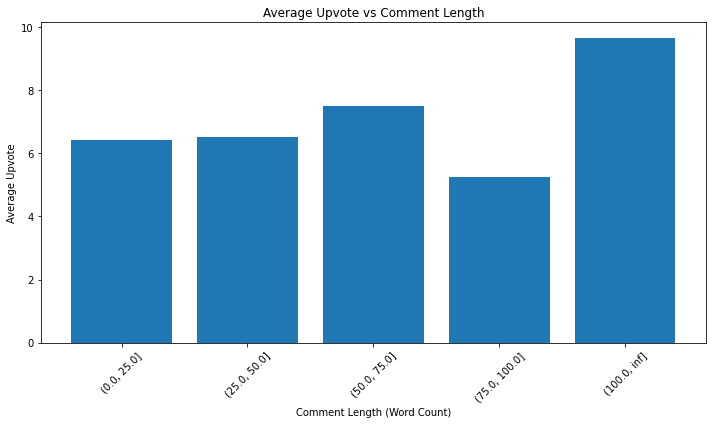

In [61]:
# Define the bins for comment length
bins = [0, 25, 50, 75, 100, float('inf')]

# Cut the data into bins and calculate the average upvote for each bin
comments_segmented['comment_length_bin'] = pd.cut(comments_segmented['word_count'], bins)
average_upvotes = comments_segmented.groupby('comment_length_bin')['upvotes'].mean()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(average_upvotes.index.astype(str), average_upvotes.values)
plt.xlabel('Comment Length (Word Count)')
plt.ylabel('Average Upvote')
plt.title('Average Upvote vs Comment Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

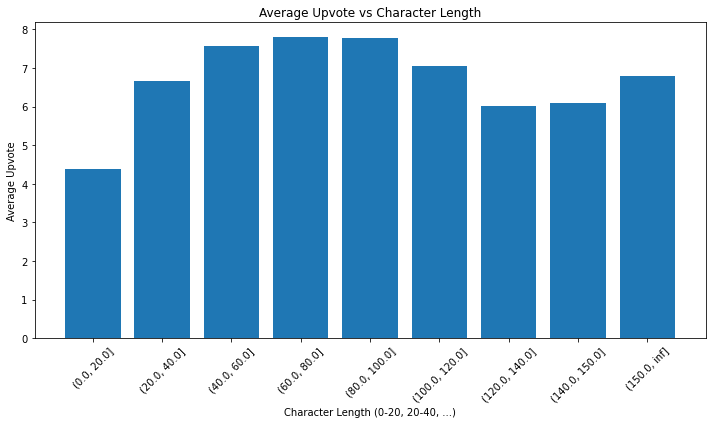

In [62]:
bins = [0, 20, 40, 60, 80, 100, 120, 140, 150, float('inf')]

# Cut the data into bins and calculate the average upvote for each bin
comments_segmented['character_length_bin'] = pd.cut(comments_segmented['character_count'], bins)
average_upvotes = comments_segmented.groupby('character_length_bin')['upvotes'].mean()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(average_upvotes.index.astype(str), average_upvotes.values)
plt.xlabel('Character Length (0-20, 20-40, ...)')
plt.ylabel('Average Upvote')
plt.title('Average Upvote vs Character Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


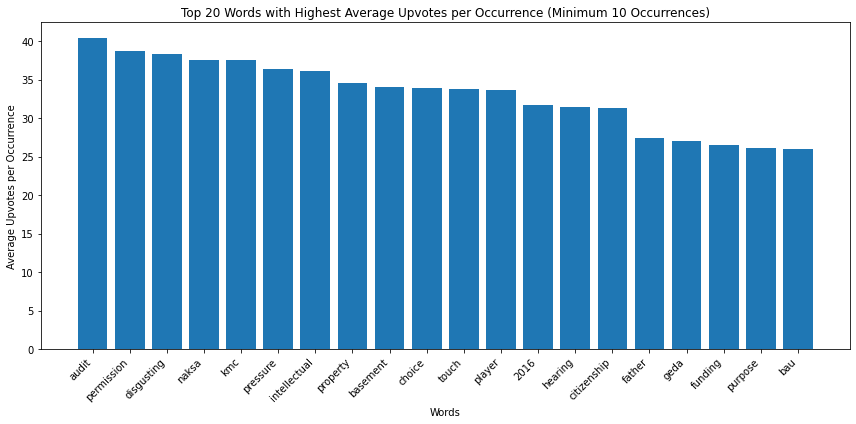

In [63]:
# Split comments into words and calculate word-wise upvotes
words = ' '.join(comments_segmented['Preprocessed']).split()
word_counts = Counter(words)
word_upvotes = {}
for word, count in word_counts.items():
    if count >= 10:
        word_upvotes[word] = comments_segmented[comments_segmented['Preprocessed'].str.contains(word)]['upvotes'].mean()

# Sort the words by average upvotes per occurrence in descending order
sorted_words = sorted(word_upvotes.keys(), key=lambda word: word_upvotes[word], reverse=True)

# Take the top 20 words
top_words = sorted_words[:20]
average_upvotes = [word_upvotes[word] for word in top_words]

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(top_words, average_upvotes)
plt.xlabel('Words')
plt.ylabel('Average Upvotes per Occurrence')
plt.title('Top 20 Words with Highest Average Upvotes per Occurrence (Minimum 10 Occurrences)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

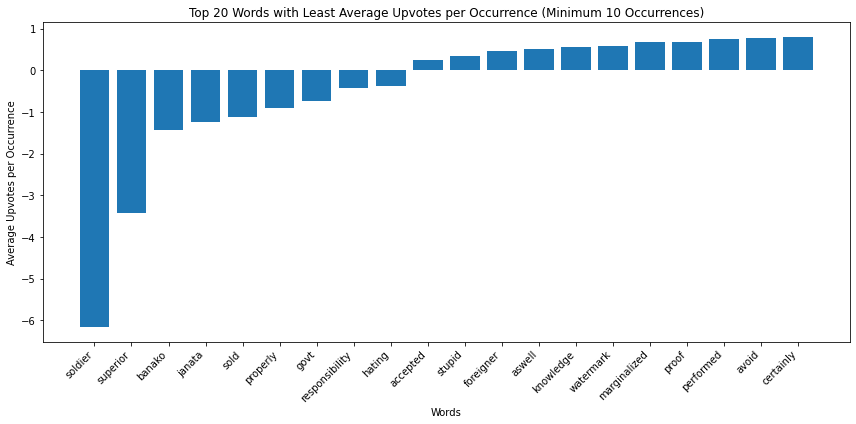

In [64]:
# Split comments into words and calculate word-wise upvotes
words = ' '.join(comments_segmented['Preprocessed']).split()
word_counts = Counter(words)
word_upvotes = {}
for word, count in word_counts.items():
    if count >= 10:
        word_upvotes[word] = comments_segmented[comments_segmented['Preprocessed'].str.contains(word)]['upvotes'].mean()

# Sort the words by average upvotes per occurrence in ascending order
sorted_words = sorted(word_upvotes.keys(), key=lambda word: word_upvotes[word])

# Take the top 20 words with the least average upvotes
top_words = sorted_words[:20]
average_upvotes = [word_upvotes[word] for word in top_words]

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(top_words, average_upvotes)
plt.xlabel('Words')
plt.ylabel('Average Upvotes per Occurrence')
plt.title('Top 20 Words with Least Average Upvotes per Occurrence (Minimum 10 Occurrences)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

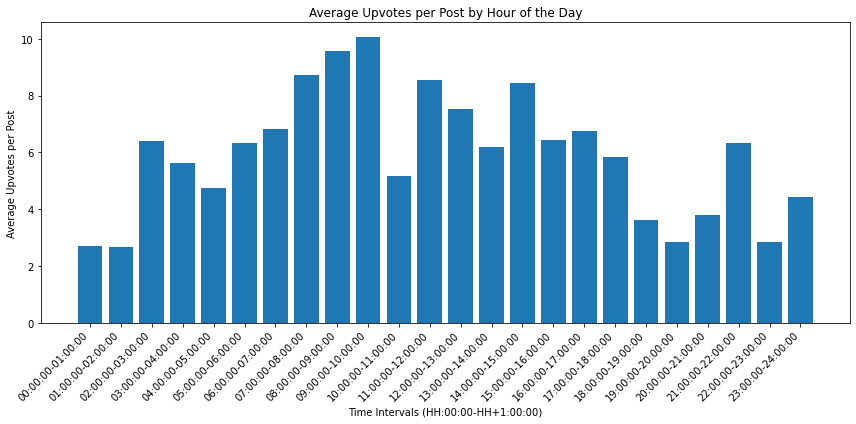

In [65]:
# Convert the 'time' column to datetime
comments_segmented['time'] = pd.to_datetime(comments_segmented['time'])

# Group the data by hour and calculate the average upvotes per hour
comments_segmented['hour'] = comments_segmented['time'].dt.hour
average_upvotes = comments_segmented.groupby('hour')['upvotes'].mean()

# Create a list of hourly time intervals
hours = [str(i).zfill(2) + ':00:00-' + str(i+1).zfill(2) + ':00:00' for i in range(24)]

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(hours, average_upvotes)
plt.xlabel('Time Intervals (HH:00:00-HH+1:00:00)')
plt.ylabel('Average Upvotes per Post')
plt.title('Average Upvotes per Post by Hour of the Day')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

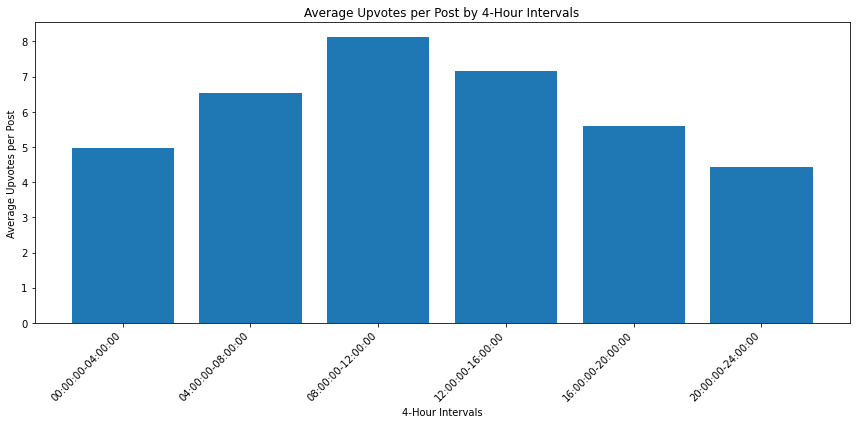

In [66]:
# Convert the 'time' column to datetime
comments_segmented['time'] = pd.to_datetime(comments_segmented['time'])

# Group the data by 4-hour intervals and calculate the average upvotes per interval
comments_segmented['4_hour_interval'] = comments_segmented['time'].dt.hour // 4
average_upvotes = comments_segmented.groupby('4_hour_interval')['upvotes'].mean()

# Create labels for 4-hour intervals
intervals = [(str(i * 4).zfill(2) + ':00:00', str((i + 1) * 4).zfill(2) + ':00:00') for i in range(6)]

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar([f'{start}-{end}' for start, end in intervals], average_upvotes)
plt.xlabel('4-Hour Intervals')
plt.ylabel('Average Upvotes per Post')
plt.title('Average Upvotes per Post by 4-Hour Intervals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


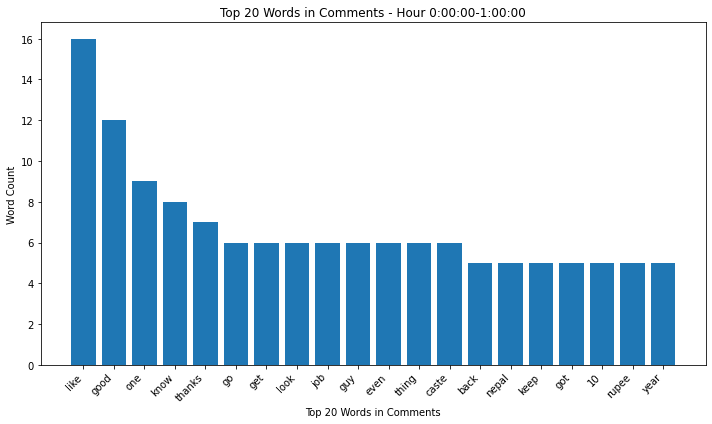

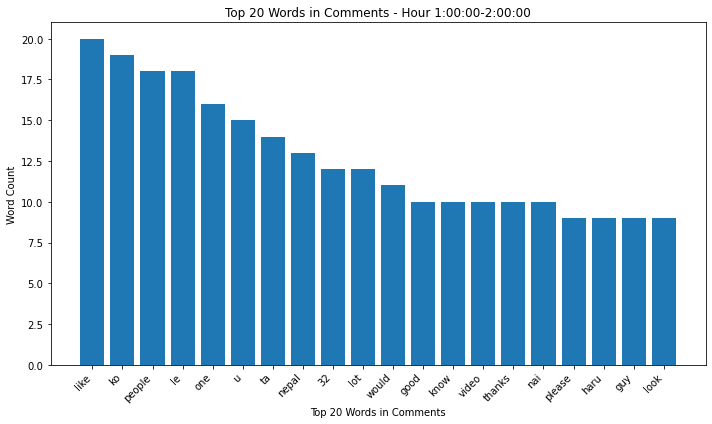

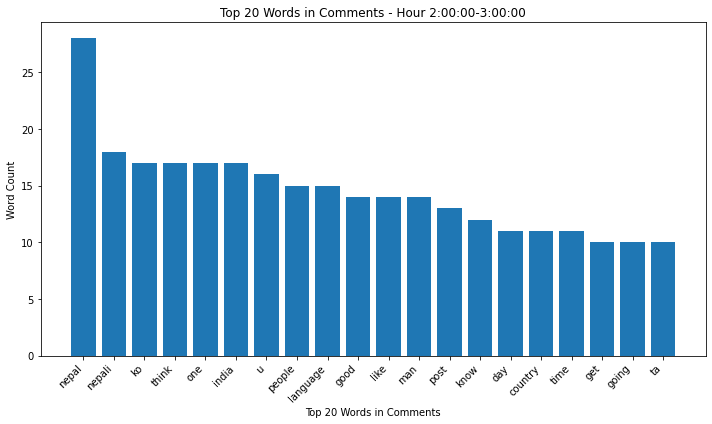

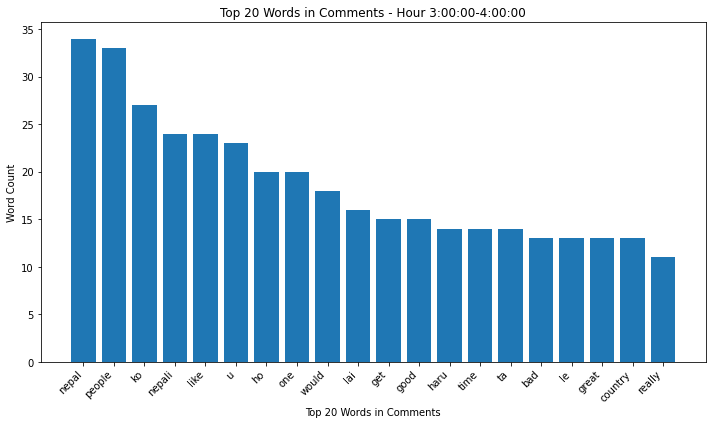

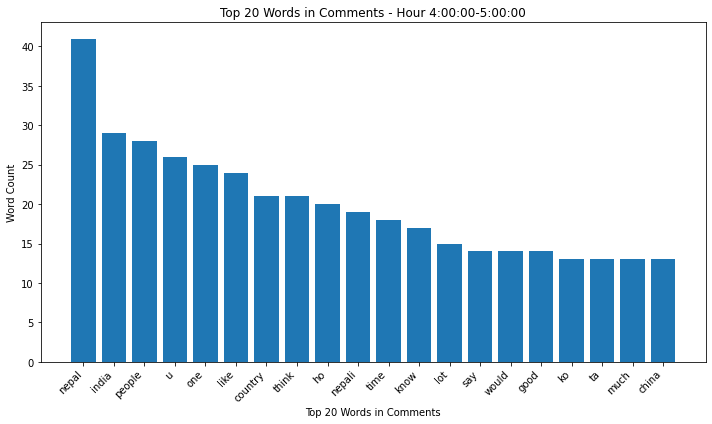

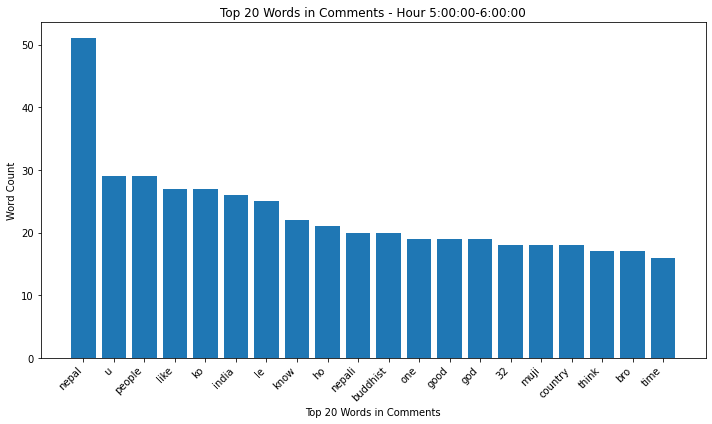

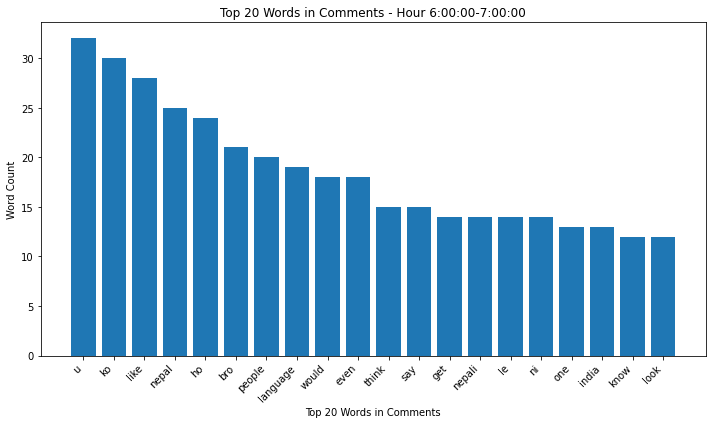

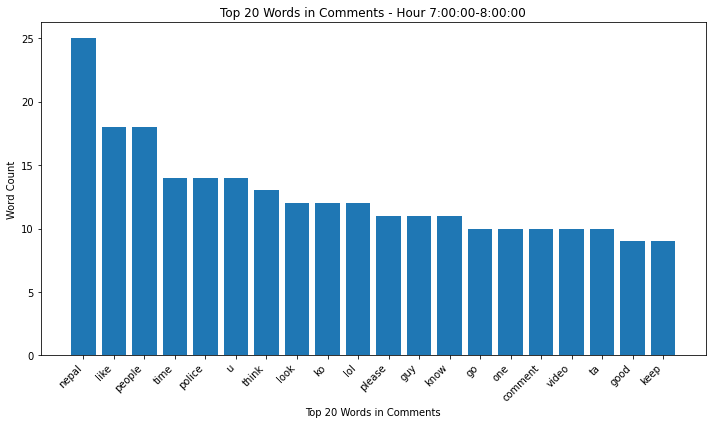

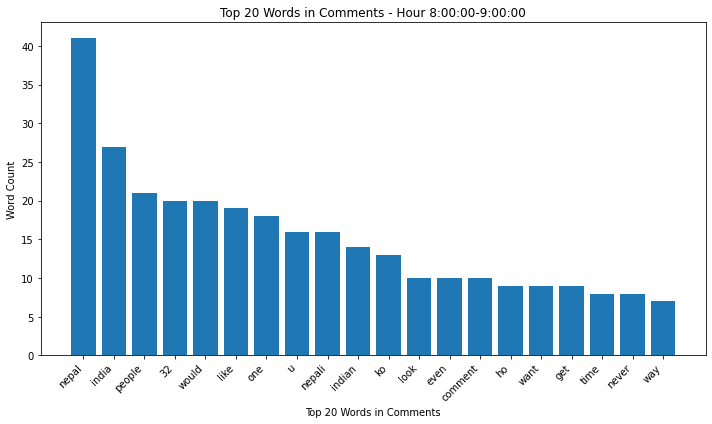

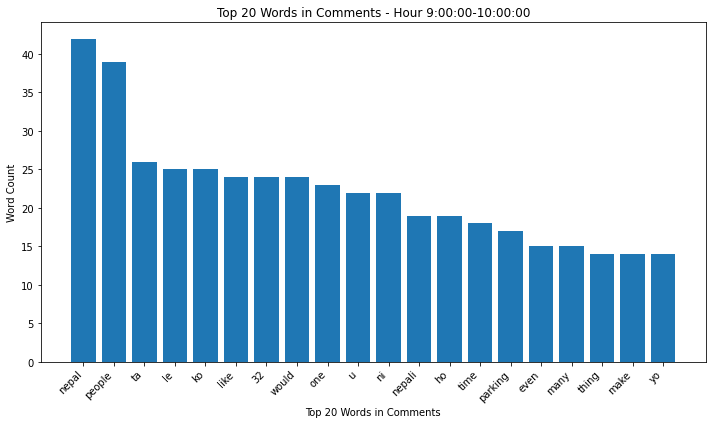

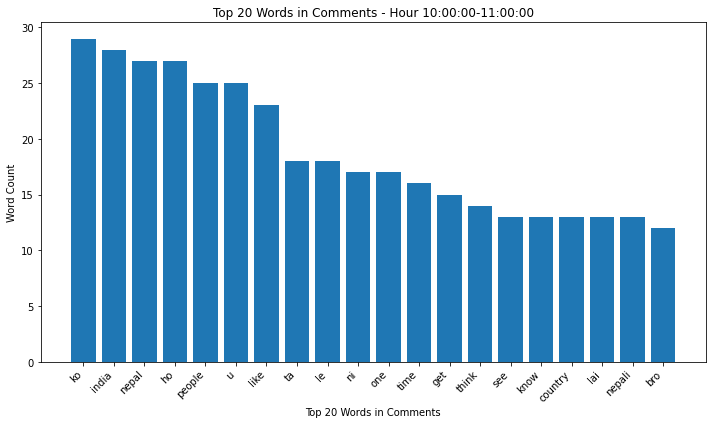

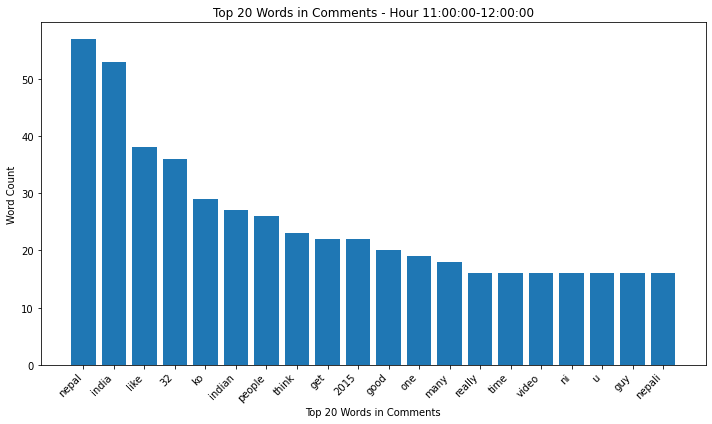

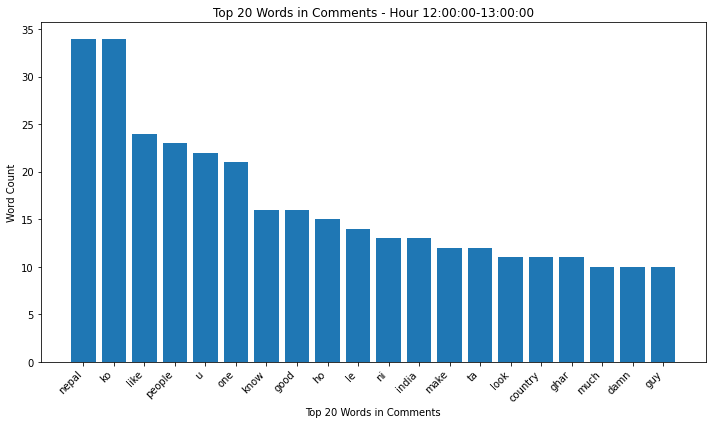

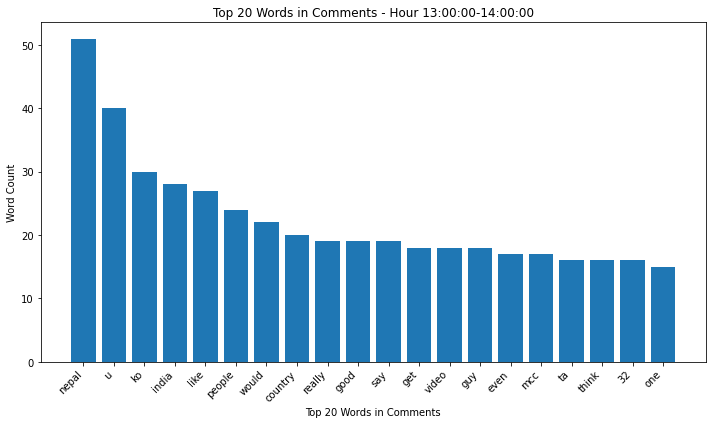

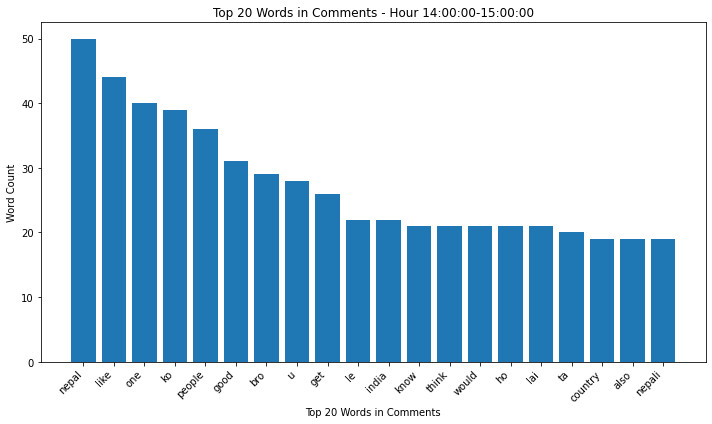

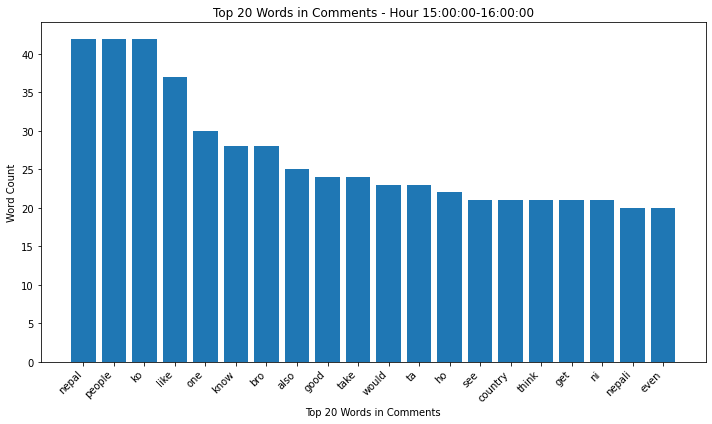

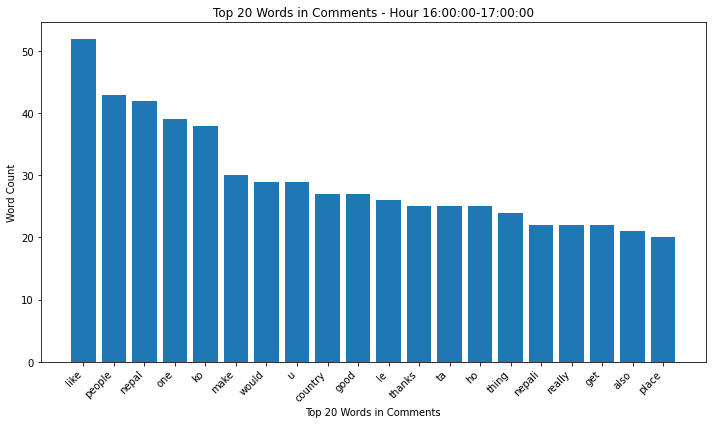

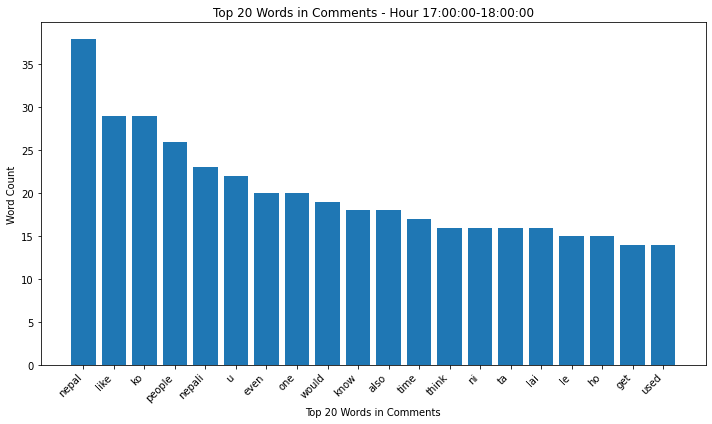

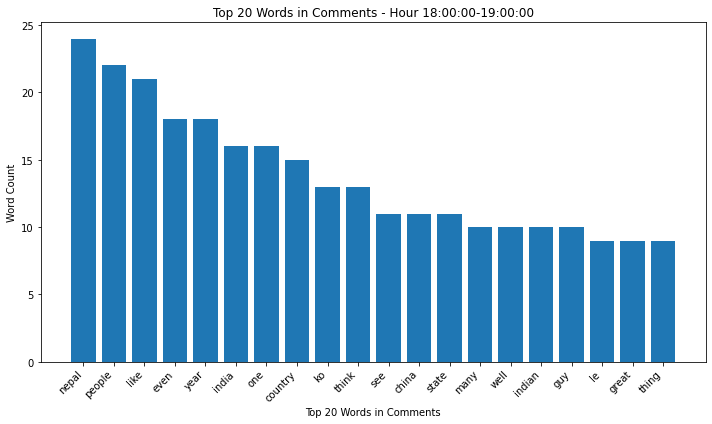

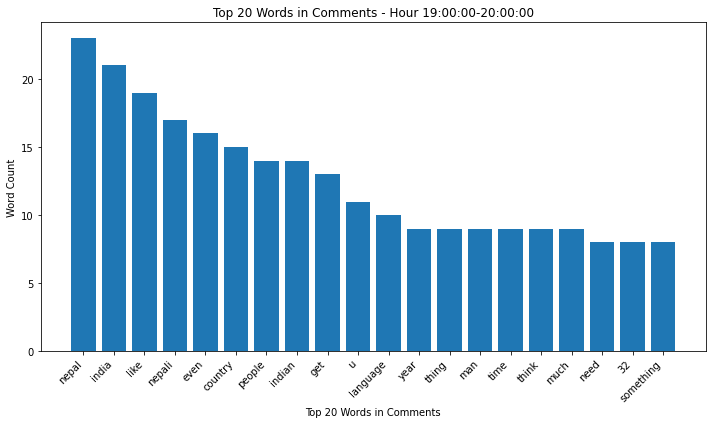

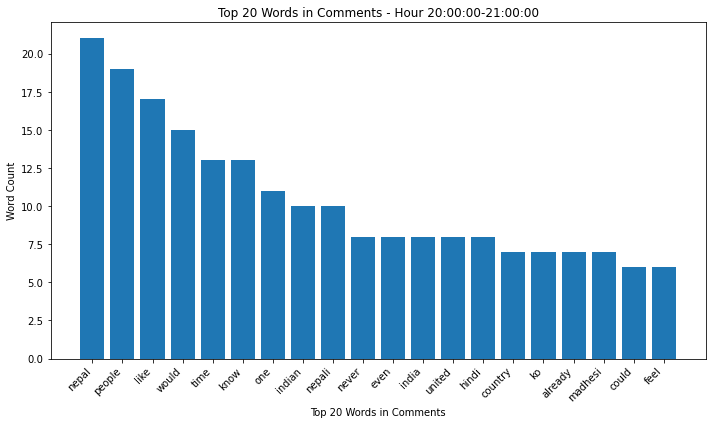

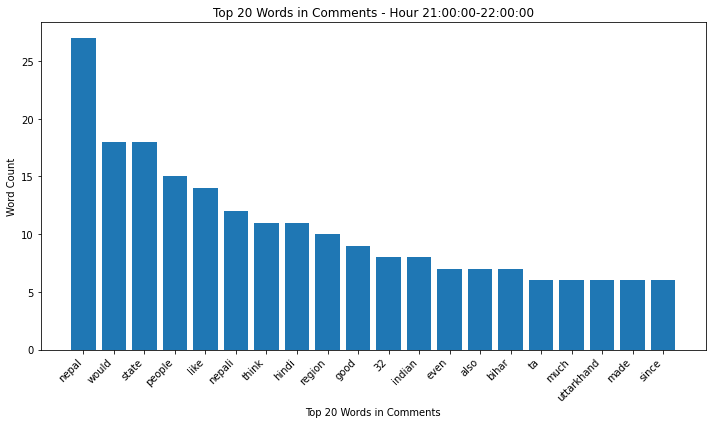

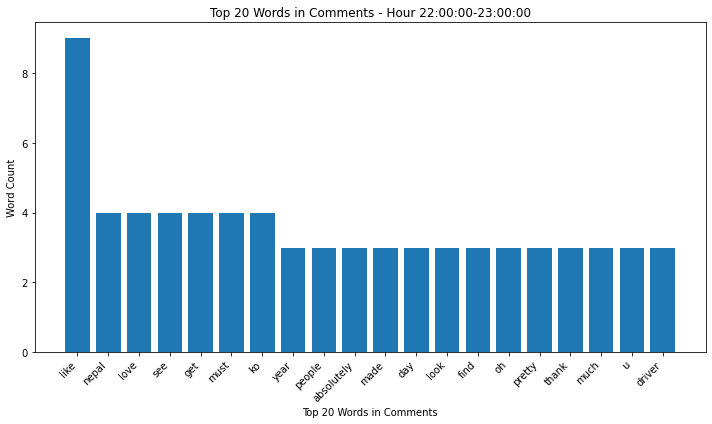

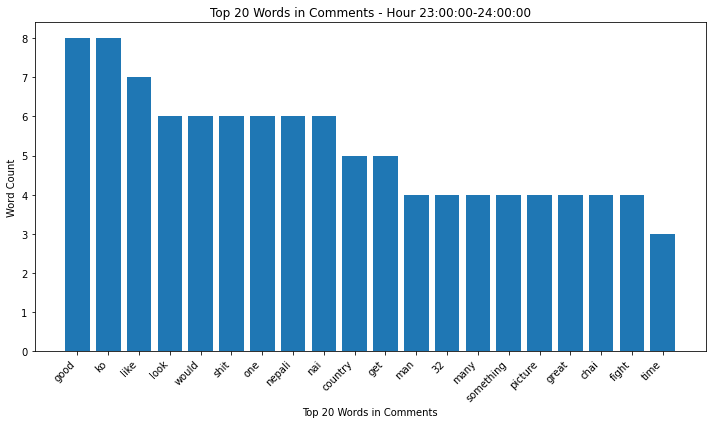

In [67]:
# Convert the 'time' column to datetime
comments_segmented['time'] = pd.to_datetime(comments_segmented['time'])

# Extract the hour from the datetime
comments_segmented['hour'] = comments_segmented['time'].dt.hour

# Define the hours you want to analyze (in this example, we analyze each hour from 0 to 23)
hours_to_analyze = range(24)

# Create separate histograms for each hour
for hour in hours_to_analyze:
    # Filter comments posted in the current hour
    comments_in_hour = comments_segmented[comments_segmented['hour'] == hour]['Preprocessed']
    
    # Combine comments into a single text
    combined_comments = ' '.join(comments_in_hour)
    
    # Split comments into words and count word occurrences
    words = combined_comments.split()
    word_counts = Counter(words)
    
    # Get the top 20 words
    top_words = [word for word, count in word_counts.most_common(20)]
    counts = [word_counts[word] for word in top_words]
    
    # Create a histogram for the current hour
    plt.figure(figsize=(10, 6))
    plt.bar(top_words, counts)
    plt.xlabel('Top 20 Words in Comments')
    plt.ylabel('Word Count')
    plt.title(f'Top 20 Words in Comments - Hour {hour}:00:00-{hour+1}:00:00')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


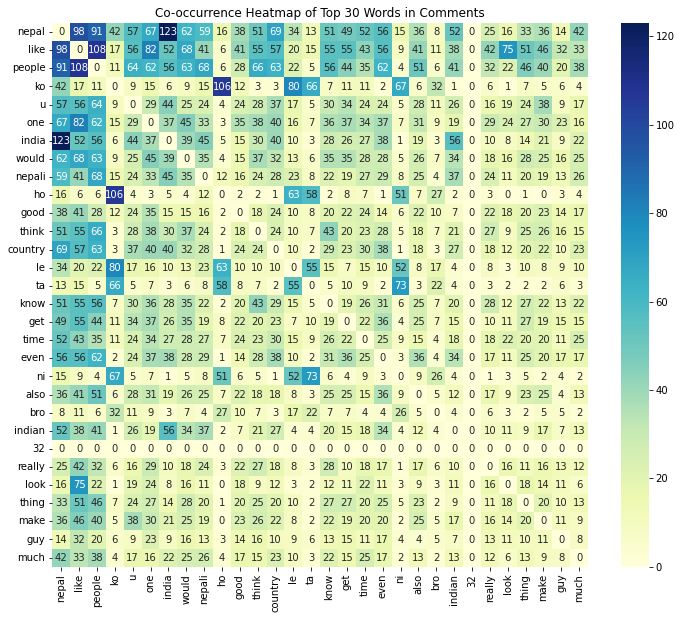

In [68]:
# Combine comments into a single text
combined_comments = ' '.join(comments_segmented['Preprocessed'])

# Split comments into words and count word occurrences
words = combined_comments.split()
word_counts = Counter(words)

# Get the top 30 words
top_words = [word for word, count in word_counts.most_common(30)]

# Create a matrix to store co-occurrence counts
co_occurrence_matrix = pd.DataFrame(0, index=top_words, columns=top_words)

# Iterate through each comment and update the co-occurrence matrix
for comment in comments_segmented['Preprocessed']:
    comment_words = set(comment.split())
    for word1, word2 in combinations(comment_words, 2):
        if word1 in top_words and word2 in top_words:
            co_occurrence_matrix.at[word1, word2] += 1
            co_occurrence_matrix.at[word2, word1] += 1

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Co-occurrence Heatmap of Top 30 Words in Comments')
plt.show()

In [69]:
merged_df = comments_segmented.merge(posts_segmented, left_on='post_id', right_on='id', how='left')
merged_df.drop('id', axis=1, inplace=True)

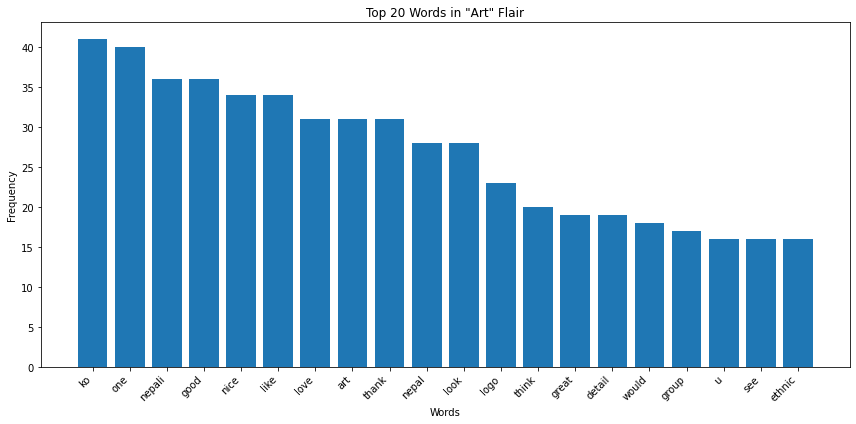

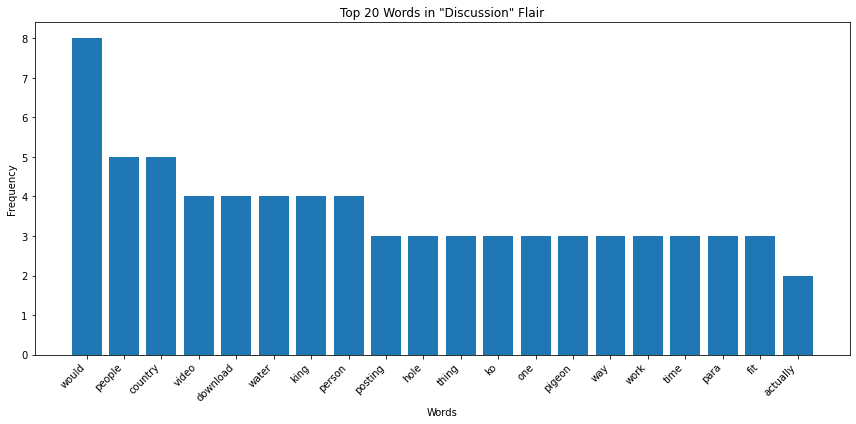

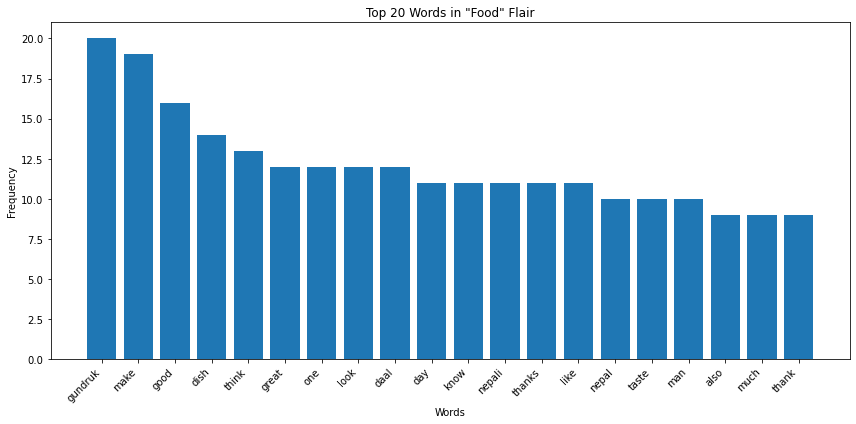

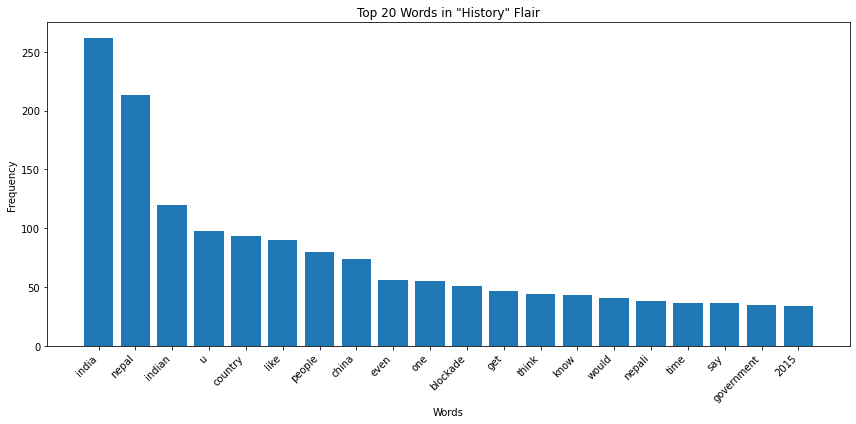

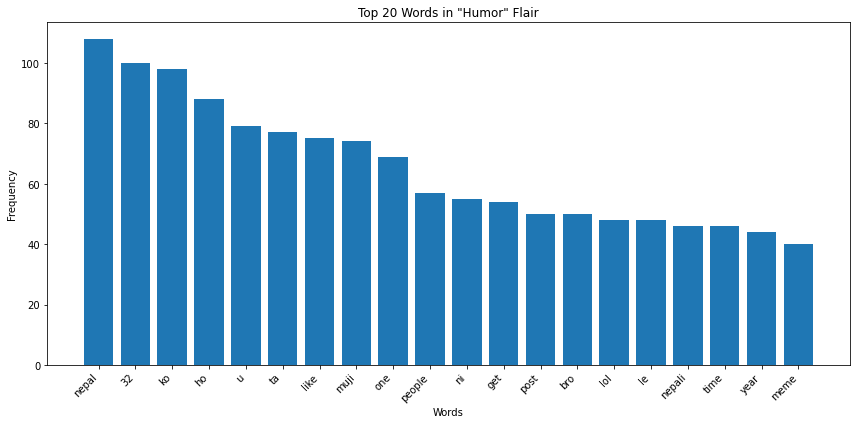

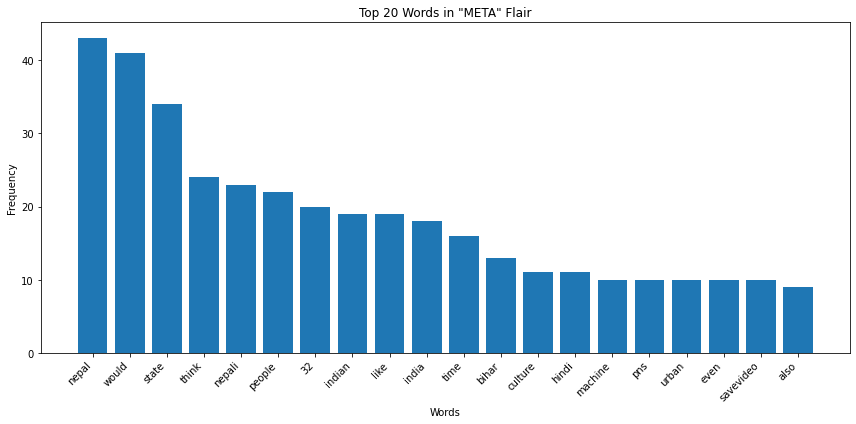

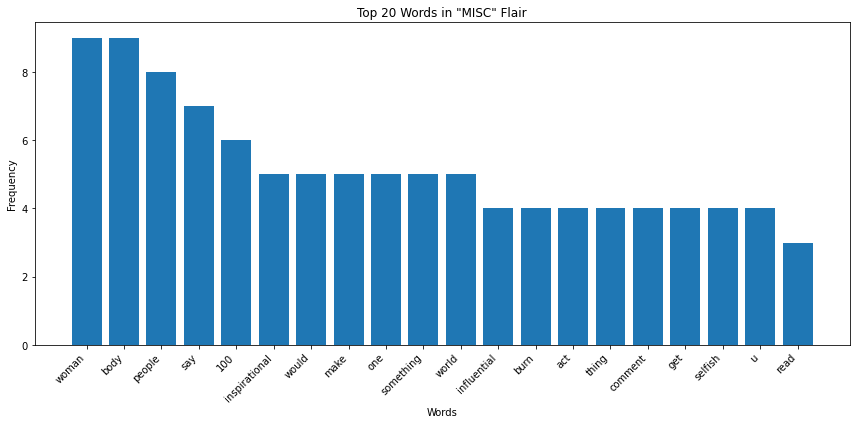

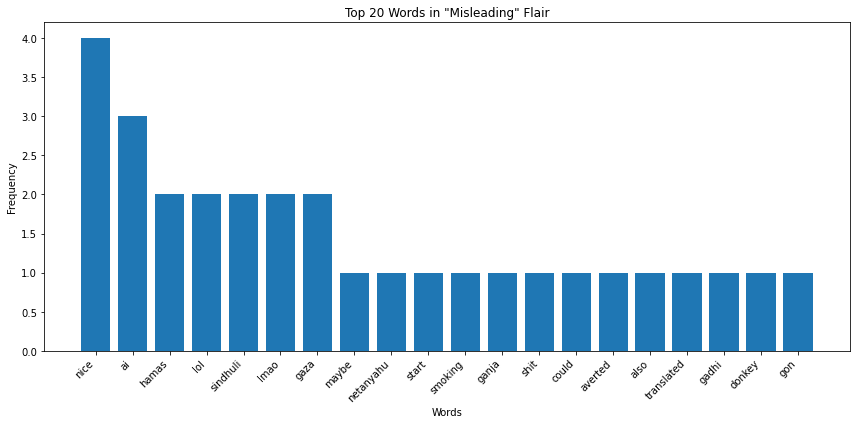

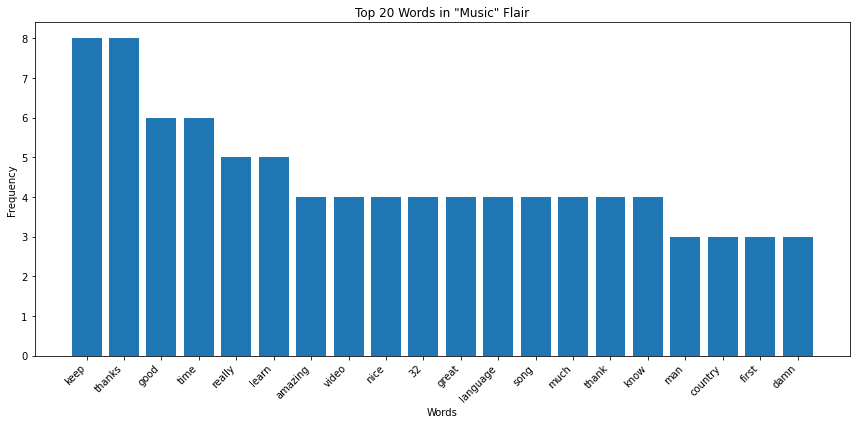

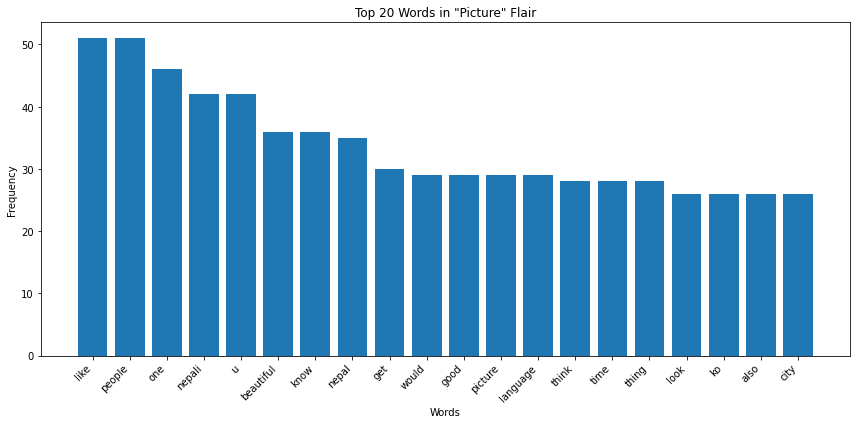

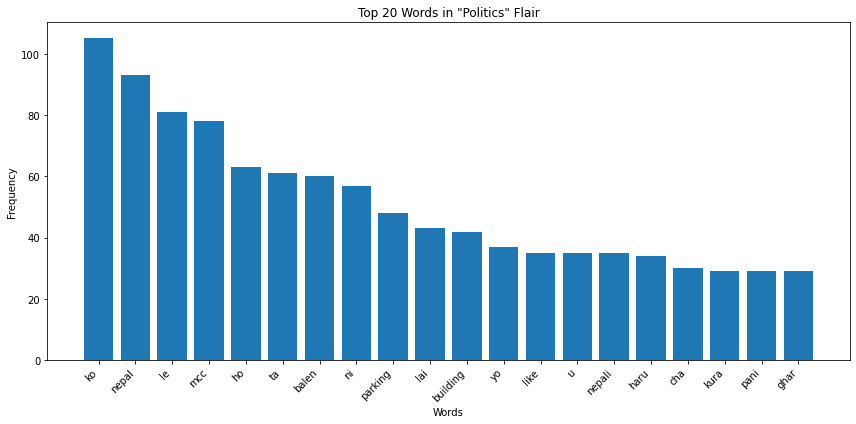

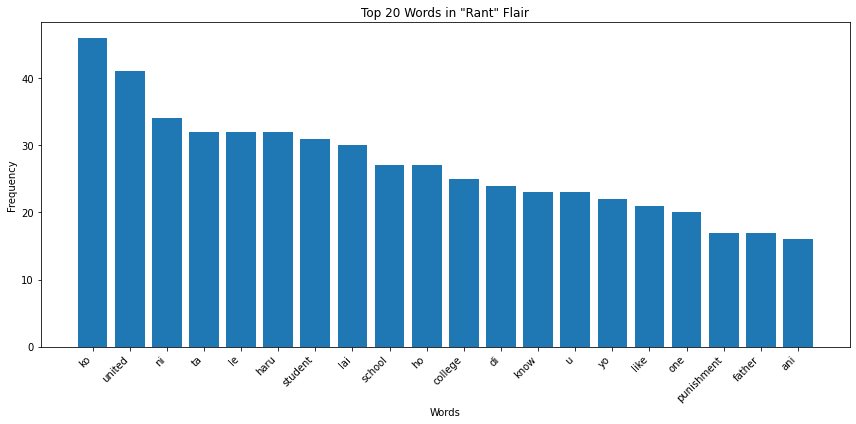

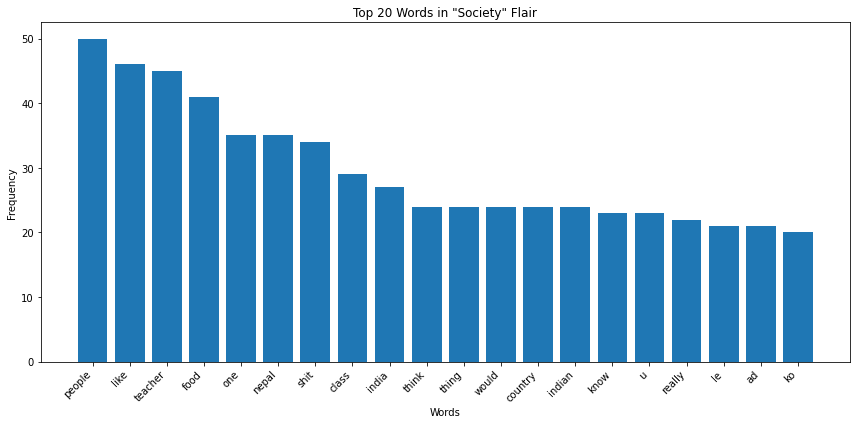

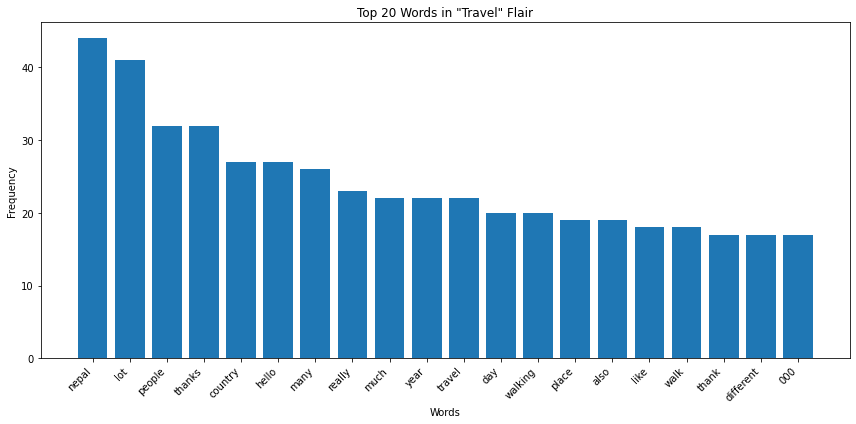

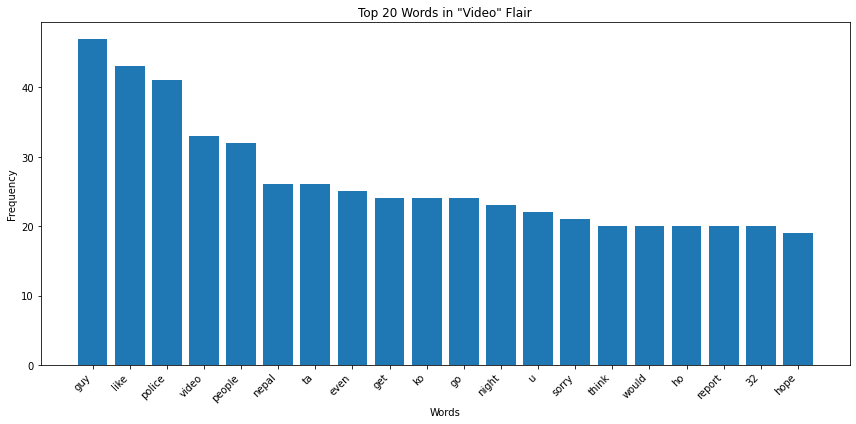

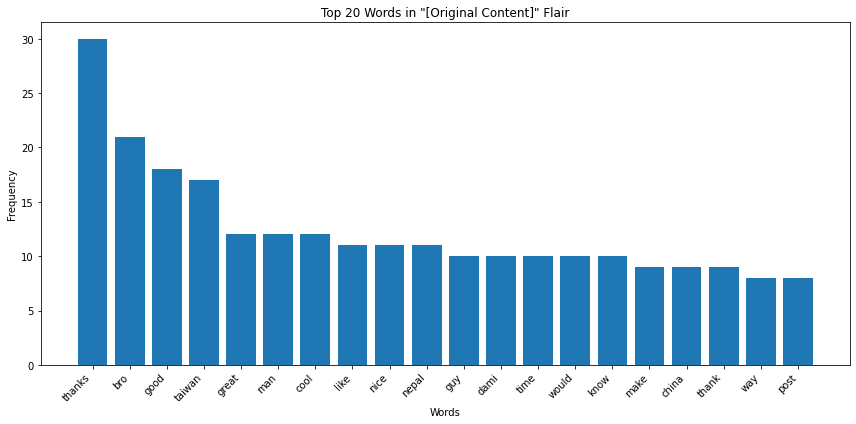

In [70]:
# Function to extract and count words from a text column
def count_words(text):
    words = text.split()
    return Counter(words)

# Group the DataFrame by 'flair', apply the count_words function, and get the top 20 words for each flair
top_words_by_flair = merged_df.groupby('flair-text')['Preprocessed'].apply(lambda x: ' '.join(x)).apply(count_words).apply(lambda x: x.most_common(20))

# Create separate bar graphs for each flair
for flair, top_words in top_words_by_flair.items():
    top_words = dict(top_words)  # Convert the Counter to a dictionary
    plt.figure(figsize=(12, 6))
    plt.bar(top_words.keys(), top_words.values())
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top 20 Words in "{flair}" Flair')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()